# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling 
from pandas_profiling import ProfileReport

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv('Temp_States.csv')


#### Print `temp`

In [3]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.describe()

Temperature
count     7.000000
mean     15.158730
std       6.695265
min       3.333333
25%      11.944444
50%      17.222222
75%      19.722222
max      22.222222

In [5]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


In [6]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

In [7]:
profile = ProfileReport(temp, title="Pandas Profiling Report")

In [8]:
temp

City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000

#### Select the rows where state is New York

In [9]:
temp[temp['State'] == 'New York']

City     State  Temperature
0      NYC  New York    19.444444
1   Albany  New York     9.444444
2  Buffalo  New York     3.333333

#### What is the average of the temperature of cities in New York?

In [10]:
temp[temp['State'] == 'New York'].mean()

Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [11]:
temp[temp['Temperature'] > 15][['City', 'State']]


City        State
0       NYC     New York
3  Hartford  Connecticut
5    Treton   New Jersey
6    Newark   New Jersey

#### Now, return only the cities that have a temperature above 15 degress Celcius

In [12]:
temp[temp['Temperature'] > 15][['City']]

City
0       NYC
3  Hartford
5    Treton
6    Newark

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [13]:
temp[(temp['Temperature'] > 15) | (temp['Temperature'] < 20)][['City']]

City
0         NYC
1      Albany
2     Buffalo
3    Hartford
4  Bridgeport
5      Treton
6      Newark

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [14]:
temp.groupby('State').agg(['mean', 'std'])


Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [15]:
employee = pd.read_csv('Employee.csv')

In [16]:
# employee.profile_report()

#### Explore the data types of the Temp dataframe. Comment your results

In [17]:
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [18]:
employee.describe()

Years     Salary
count  9.000000   9.000000
mean   4.111111  48.888889
std    2.803767  16.541194
min    1.000000  30.000000
25%    2.000000  35.000000
50%    3.000000  55.000000
75%    7.000000  60.000000
max    8.000000  70.000000

In [19]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


In [20]:
employee.head()

Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55

#### Show visually the frequency distribution (histogram) of the employee dataset (Years and Salary, 20 buckets). In few words describe these histograms?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc728249250>,
      dtype=object)

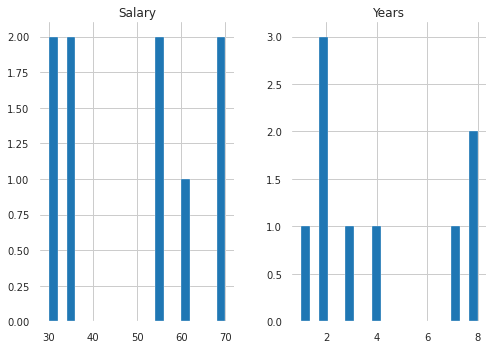

In [21]:
employee.hist(bins=20)

There's a significant gap in both histograms. It seems, no one is paid between 36-50k, as well as no one is employed at the company between 4 and 7 years.

#### What's the average salary in this company?

In [22]:
print(str(round(employee['Salary'].mean(),2)) + ' Thousand dollars')

48.89 Thousand dollars


#### What's the highest salary?

In [23]:
print(str(round(employee['Salary'].max(),2)) + ' Thousand dollars')

70 Thousand dollars


#### What's the lowest salary?

In [24]:
print(str(round(employee['Salary'].min(),2)) + ' Thousand dollars')

30 Thousand dollars


#### Who are the employees with the lowest salary?

In [25]:
employee[employee['Salary'] == employee['Salary'].min()]['Name']

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [26]:
employee[employee['Name'] == 'David']


Name Department Education Gender    Title  Years  Salary
2  David         HR    Master      M  analyst      2      30

#### Could you give only David's salary?

In [27]:
employee[employee['Name'] == 'David']['Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [28]:
employee[employee['Title'] == 'associate']

Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60

#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [29]:
employee.head(3)


Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30

In [30]:
employee.iloc[:3,:]


Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30

#### Find the employees who's title is associate and the salary above 55?

In [31]:
employee[(employee['Title'] == 'associate') & (employee['Salary'] >55)]


Name Department Education Gender      Title  Years  Salary
7  Pedro         IT       Phd      M  associate      7      60

#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [32]:
employee.groupby('Years').agg('mean')

Salary
Years           
1      35.000000
2      38.333333
3      55.000000
4      35.000000
7      60.000000
8      70.000000

####  What is the average Salary per title?

In [33]:
employee.groupby('Title').agg('mean')[['Salary']]

Salary
Title               
VP         70.000000
analyst    32.500000
associate  56.666667

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

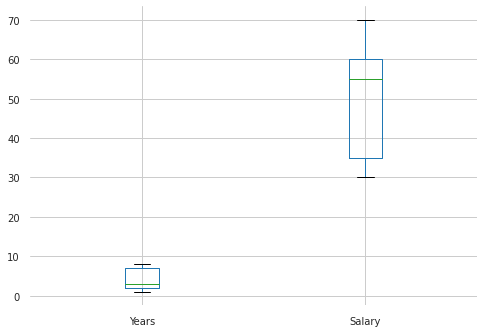

In [34]:
boxplot = employee.boxplot(return_type='dict')

In [35]:
# First quartiles:
employee.describe().loc['25%']

Years      2.0
Salary    35.0
Name: 25%, dtype: float64

In [36]:
# Third quartiles
employee.describe().loc['75%']

Years      7.0
Salary    60.0
Name: 75%, dtype: float64

#### Is the mean salary per gender different?

In [37]:
employee.groupby('Gender').agg('mean')[['Salary']]
# YES

Salary
Gender        
F         47.5
M         50.0

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [38]:
employee.groupby('Department').agg(['mean', 'max', 'min'])

Years         Salary        
                mean max min   mean max min
Department                                 
HR          4.666667   8   2  45.00  70  30
IT          4.500000   8   1  48.75  70  30
Sales       2.500000   3   2  55.00  55  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [45]:
minmaxdiff = lambda x,y : x-y

min_max_df = employee.groupby('Department').agg(['max', 'min'])['Salary']
min_max_df['max_min_diff'] = min_max_df['max'] - min_max_df['min']
min_max_df['max_min_diff']

Department
HR       40
IT       40
Sales     0
Name: max_min_diff, dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [50]:
orders = pd.read_csv('Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [51]:
orders.head()

Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
0           0     536365    85123A  2010     12    3     8   
1           1     536365     71053  2010     12    3     8   
2           2     536365    84406B  2010     12    3     8   
3           3     536365    84029G  2010     12    3     8   
4           4     536365    84029E  2010     12    3     8   

                           Description  Quantity          InvoiceDate  \
0   white hanging heart t-light holder         6  2010-12-01 08:26:00   
1                  white metal lantern         6  2010-12-01 08:26:00   
2       cream cupid hearts coat hanger         8  2010-12-01 08:26:00   
3  knitted union flag hot water bottle         6  2010-12-01 08:26:00   
4       red woolly hottie white heart.         6  2010-12-01 08:26:00   

   UnitPrice  CustomerID         Country  amount_spent  
0       2.55       17850  United Kingdom         15.30  
1       3.39       17850  United Kingdom         20.34  
2       2.75       17850  United Kingdom         22.00  
3       3.39       17850  United Kingdom         20.34  
4       3.39       17850  United Kingdom         20.34

In [52]:
orders.describe()

Unnamed: 0      InvoiceNo           year          month  \
count  397924.000000  397924.000000  397924.000000  397924.000000   
mean   278465.221859  560617.126645    2010.934259       7.612537   
std    152771.368303   13106.167695       0.247829       3.416527   
min         0.000000  536365.000000    2010.000000       1.000000   
25%    148333.750000  549234.000000    2011.000000       5.000000   
50%    284907.500000  561893.000000    2011.000000       8.000000   
75%    410079.250000  572090.000000    2011.000000      11.000000   
max    541908.000000  581587.000000    2011.000000      12.000000   

                 day           hour       Quantity      UnitPrice  \
count  397924.000000  397924.000000  397924.000000  397924.000000   
mean        3.614555      12.728247      13.021823       3.116174   
std         1.928274       2.273535     180.420210      22.096788   
min         1.000000       6.000000       1.000000       0.000000   
25%         2.000000      11.000000       2.000000       1.250000   
50%         3.000000      13.000000       6.000000       1.950000   
75%         5.000000      14.000000      12.000000       3.750000   
max         7.000000      20.000000   80995.000000    8142.750000   

          CustomerID   amount_spent  
count  397924.000000  397924.000000  
mean    15294.315171      22.394749  
std      1713.169877     309.055588  
min     12346.000000       0.000000  
25%     13969.000000       4.680000  
50%     15159.000000      11.800000  
75%     16795.000000      19.800000  
max     18287.000000  168469.600000

In [54]:
report = ProfileReport(orders)
report

####  What is the average Purchase Price?

In [60]:
orders.groupby('InvoiceNo').agg('sum')['amount_spent'].mean()

480.7621873111783

#### What were the highest and lowest purchase prices? 

In [64]:
print("Lowest: ", orders.groupby('InvoiceNo').agg('sum')['amount_spent'].min())
print("Highest: ", orders.groupby('InvoiceNo').agg('sum')['amount_spent'].max())

Lowest:  0.0
Highest:  168469.6


#### Select all the customers we have in Spain

In [69]:
orders[orders['Country'] == 'Spain'].groupby('CustomerID').agg('last')

Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
CustomerID                                                            
12354           166324     550911     22661  2011      4    4    13   
12417           171243     551398      POST  2011      4    4    13   
12421           495928     578339      POST  2011     11    4     9   
12442           531431     580955      POST  2011     12    2    14   
12445           478972     577125      POST  2011     11    4    18   
12448           420324     572886      POST  2011     10    3    13   
12450           252963     559148     21868  2011      7    3    14   
12454           398640     571255    72802C  2011     10    5    17   
12455           363259     568554     21215  2011      9    2    15   
12462           485499     577606      POST  2011     11    1     9   
12484           445390     574838      POST  2011     11    1    11   
12502           326372     565519      POST  2011      9    1    11   
12507           282912     561669     22960  2011      7    4    17   
12510           271029     560607      POST  2011      7    3    10   
12538           456744     575707     22720  2011     11    4    17   
12539           476971     577039     21210  2011     11    4    13   
12540           482538     577476      POST  2011     11    7    11   
12541           454193     575514      POST  2011     11    4    10   
12544           437993     574301      POST  2011     11    4    16   
12545           359187     568179      POST  2011      9    7    13   
12546           414285     572442      POST  2011     10    1    12   
12547           205318     554792      POST  2011      5    4    12   
12548           240670     558108      POST  2011      6    7    15   
12550           350561     567653    84625A  2011      9    3    14   
12551            34404     539351     21935  2010     12    5    11   
12556           409560     572065     72741  2011     10    4    13   
12557           495742     578321    84997C  2011     11    3    16   
12596           407283     571851      POST  2011     10    3    13   
12597           484175     577523      POST  2011     11    7    13   
17097           535275     581193     23247  2011     12    3    17   

                                   Description  Quantity          InvoiceDate  \
CustomerID                                                                      
12354          charlotte bag dolly girl design        10  2011-04-21 13:11:00   
12417                                  postage         3  2011-04-28 13:09:00   
12421                                  postage         1  2011-11-24 09:07:00   
12442                                  postage         1  2011-12-06 14:22:00   
12445                                  postage         2  2011-11-17 18:43:00   
12448                                  postage         3  2011-10-26 13:46:00   
12450                     potting shed tea mug        24  2011-07-06 14:41:00   
12454        vanilla scent candle jewelled box       288  2011-10-14 17:13:00   
12455              ivory paper cup cake cases         24  2011-09-27 15:31:00   
12462                                  postage         3  2011-11-21 09:11:00   
12484                                  postage         5  2011-11-07 11:37:00   
12502                                  postage         7  2011-09-05 11:52:00   
12507                 jam making set with jars        11  2011-07-28 17:09:00   
12510                                  postage         3  2011-07-20 10:15:00   
12538        set of 3 cake tins pantry design          3  2011-11-10 17:16:00   
12539       set of 72 retrospot paper  doilies        12  2011-11-17 13:30:00   
12540                                  postage         3  2011-11-20 11:31:00   
12541                                  postage         3  2011-11-10 10:40:00   
12544                                  postage         2  2011-11-03 16:15:00   
12545                                 

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [78]:
len(orders[orders['Country'] == 'Spain'].groupby('CustomerID').agg('last'))

30

#### Select all the customers who have bought more than 50 items ?

In [86]:
orders.groupby('CustomerID').sum()[orders.groupby('CustomerID').sum()['Quantity'] > 50]

Unnamed: 0  InvoiceNo     year  month   day   hour  Quantity  \
CustomerID                                                                 
12346            61619     541431     2011      1     2     10     74215   
12347         42441700  101296926   365971   1383   441   2219      2458   
12348          2807120   16869685    62324    257   111    472      2341   
12349         35444274   42165457   146803    803    73    657       631   
12350          1365627    9231629    34187     34    51    272       197   
...                ...        ...      ...    ...   ...    ...       ...   
18278          3262446    5116428    18099     81    18     99        66   
18281          1560699    3895248    14077     42    49     70        54   
18282          4642134    6838540    24132    116    60    146       103   
18283        233950830  425704048  1520316   5503  2489  10346      1397   
18287         21958901   39474556   140770    555   332    697      1586   

            UnitPrice  amount_spent  
CustomerID                           
12346            1.04      77183.60  
12347          481.21       4310.00  
12348          178.71       1797.24  
12349          605.10       1757.55  
12350           65.30        334.40  
...               ...           ...  
18278           29.55        173.90  
18281           39.36         80.82  
18282           62.39        178.05  
18283         1220.93       2094.88  
18287          104.55       1837.28  

[4091 rows x 9 columns]

#### Select orders from Spain that are above 50 items

In [90]:
orders_spain = orders[orders['Country'] == 'Spain']


orders_spain.groupby('InvoiceNo').sum()[orders_spain.groupby('InvoiceNo').sum()['Quantity'] > 50]

Unnamed: 0    year  month  day  hour  Quantity  UnitPrice  \
InvoiceNo                                                              
536944          32115   10050     60   25    60       400       7.85   
538095         863380   80400    480  160   560        67     128.97   
538525         545570   40200    240   20   180       300      97.14   
539351         343995   20100    120   50   110       100      16.80   
540469        4761477  197078     98  490  1372       630     286.64   
...               ...     ...    ...  ...   ...       ...        ...   
578321        1982962    8044     44   12    64       920      12.70   
578339        4463316   18099     99   36    81        77      48.34   
579503       15856407   62341    341   62   496       117      69.03   
580955        6377106   24132    144   24   168       182      40.08   
581193       28368197  106583    636  159   901        92      89.53   

           CustomerID  amount_spent  
InvoiceNo                            
536944          62785        620.00  
538095         683880        174.72  
538525         250800        881.01  
539351         125510        168.00  
540469        1223432       1138.67  
...               ...           ...  
578321          50228       2990.00  
578339         111789        178.48  
579503         530007        170.74  
580955         149304        172.06  
581193         906141        144.15  

[80 rows x 9 columns]

#### Select all free orders

In [95]:
orders.groupby('InvoiceNo').agg('sum')[orders.groupby('InvoiceNo').agg('sum')['amount_spent'] == 0]

Unnamed: 0  year  month  day  hour  Quantity  UnitPrice  \
InvoiceNo                                                            
543599          86789  2011      2    4    13        16        0.0   
564651        1258986  8044     32   20    56       576        0.0   
568384         361825  2011      9    2     9         1        0.0   
578841         502122  2011     11    5    15     12540        0.0   

           CustomerID  amount_spent  
InvoiceNo                            
543599          17560           0.0  
564651          58584           0.0  
568384          12748           0.0  
578841          13256           0.0

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [99]:
orders[orders['Description'].apply(lambda x: 'lunch bag' in x)]

Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
93              93     536378     20725  2010     12    3     9   
172            174     536385     22662  2010     12    3     9   
354            363     536401     22662  2010     12    3    11   
359            368     536401     20725  2010     12    3    11   
360            369     536401     22382  2010     12    3    11   
...            ...        ...       ...   ...    ...  ...   ...   
397465      540436     581486     23207  2011     12    5     9   
397713      541695     581538     20727  2011     12    5    11   
397714      541696     581538     20725  2011     12    5    11   
397877      541862     581581     23681  2011     12    5    12   
397880      541865     581583     20725  2011     12    5    12   

                        Description  Quantity          InvoiceDate  UnitPrice  \
93          lunch bag red retrospot        10  2010-12-01 09:37:00       1.65   
172     lunch bag dolly girl design        10  2010-12-01 09:56:00       1.65   
354     lunch bag dolly girl design         1  2010-12-01 11:21:00       1.65   
359         lunch bag red retrospot         1  2010-12-01 11:21:00       1.65   
360      lunch bag spaceboy design          2  2010-12-01 11:21:00       1.65   
...                             ...       ...                  ...        ...   
397465    lunch bag alphabet design        10  2011-12-09 09:38:00       1.65   
397713      lunch bag  black skull.         1  2011-12-09 11:34:00       1.65   
397714      lunch bag red retrospot         1  2011-12-09 11:34:00       1.65   
397877  lunch bag red vintage doily        10  2011-12-09 12:20:00       1.65   
397880      lunch bag red retrospot        40  2011-12-09 12:23:00       1.45   

        CustomerID         Country  amount_spent  
93           14688  United Kingdom         16.50  
172          17420  United Kingdom         16.50  
354          15862  United Kingdom          1.65  
359          15862  United Kingdom          1.65  
360          15862  United Kingdom          3.30  
...            ...             ...           ...  
397465       17001  United Kingdom         16.50  
397713       14446  United Kingdom          1.65  
397714       14446  United Kingdom          1.65  
397877       17581  United Kingdom         16.50  
397880       13777  United Kingdom         58.00  

[11556 rows x 14 columns]

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [100]:
orders[orders['Description'].apply(lambda x: 'lunch bag' in x) & (orders['year'] == 2011)]

Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
26340        42678     540015     20725  2011      1    2    11   
26341        42679     540015     20726  2011      1    2    11   
26512        42851     540023     22382  2011      1    2    12   
26513        42852     540023     20726  2011      1    2    12   
26860        43616     540098     22384  2011      1    2    15   
...            ...        ...       ...   ...    ...  ...   ...   
397465      540436     581486     23207  2011     12    5     9   
397713      541695     581538     20727  2011     12    5    11   
397714      541696     581538     20725  2011     12    5    11   
397877      541862     581581     23681  2011     12    5    12   
397880      541865     581583     20725  2011     12    5    12   

                        Description  Quantity          InvoiceDate  UnitPrice  \
26340       lunch bag red retrospot        10  2011-01-04 11:40:00       1.65   
26341            lunch bag woodland        10  2011-01-04 11:40:00       1.65   
26512    lunch bag spaceboy design          2  2011-01-04 12:58:00       1.65   
26513            lunch bag woodland         1  2011-01-04 12:58:00       1.65   
26860       lunch bag pink polkadot         1  2011-01-04 15:50:00       1.65   
...                             ...       ...                  ...        ...   
397465    lunch bag alphabet design        10  2011-12-09 09:38:00       1.65   
397713      lunch bag  black skull.         1  2011-12-09 11:34:00       1.65   
397714      lunch bag red retrospot         1  2011-12-09 11:34:00       1.65   
397877  lunch bag red vintage doily        10  2011-12-09 12:20:00       1.65   
397880      lunch bag red retrospot        40  2011-12-09 12:23:00       1.45   

        CustomerID         Country  amount_spent  
26340        13319  United Kingdom         16.50  
26341        13319  United Kingdom         16.50  
26512        15039  United Kingdom          3.30  
26513        15039  United Kingdom          1.65  
26860        16241  United Kingdom          1.65  
...            ...             ...           ...  
397465       17001  United Kingdom         16.50  
397713       14446  United Kingdom          1.65  
397714       14446  United Kingdom          1.65  
397877       17581  United Kingdom         16.50  
397880       13777  United Kingdom         58.00  

[11234 rows x 14 columns]

#### Show the frequency distribution of the amount spent in Spain.

Text(0.5, 1.0, 'Histogram of amount spent per invoice in Spain')

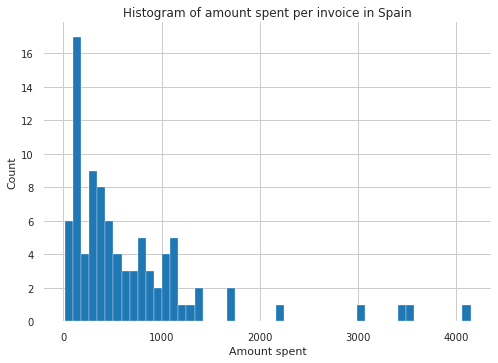

In [111]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
orders[orders['Country'] == 'Spain'].groupby('InvoiceNo').agg('sum')['amount_spent'].hist(ax=ax, bins=50)
ax.set_xlabel('Amount spent')
ax.set_ylabel('Count')
ax.set_title('Histogram of amount spent per invoice in Spain')

#### Select all orders made in the month of August

In [113]:
orders[orders['month'] == 8]

Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
199475      285421     561904     22075  2011      8    1     8   
199476      285422     561904    85049E  2011      8    1     8   
199477      285423     561905     21385  2011      8    1     9   
199478      285424     561905    84970L  2011      8    1     9   
199479      285425     561905    84970S  2011      8    1     9   
...            ...        ...       ...   ...    ...  ...   ...   
226483      320688     565067     22644  2011      8    3    17   
226484      320689     565067     22645  2011      8    3    17   
226485      320690     565067     22637  2011      8    3    17   
226486      320691     565067     22646  2011      8    3    17   
226487      320692     565067     22741  2011      8    3    17   

                                Description  Quantity          InvoiceDate  \
199475         6 ribbons elegant christmas         96  2011-08-01 08:30:00   
199476            scandinavian reds ribbons       156  2011-08-01 08:30:00   
199477      ivory hanging decoration  heart        24  2011-08-01 09:31:00   
199478     single heart zinc t-light holder        12  2011-08-01 09:31:00   
199479    hanging heart zinc t-light holder        12  2011-08-01 09:31:00   
...                                     ...       ...                  ...   
226483       ceramic cherry cake money bank         2  2011-08-31 17:16:00   
226484  ceramic heart fairy cake money bank         2  2011-08-31 17:16:00   
226485                piggy bank retrospot          2  2011-08-31 17:16:00   
226486   ceramic strawberry cake money bank         2  2011-08-31 17:16:00   
226487                       funky diva pen        48  2011-08-31 17:16:00   

        UnitPrice  CustomerID         Country  amount_spent  
199475       1.45       17941  United Kingdom        139.20  
199476       1.06       17941  United Kingdom        165.36  
199477       0.85       14947  United Kingdom         20.40  
199478       0.95       14947  United Kingdom         11.40  
199479       0.85       14947  United Kingdom         10.20  
...           ...         ...             ...           ...  
226483       1.45       15856  United Kingdom          2.90  
226484       1.45       15856  United Kingdom          2.90  
226485       2.55       15856  United Kingdom          5.10  
226486       1.45       15856  United Kingdom          2.90  
226487       0.85       15856  United Kingdom         40.80  

[27013 rows x 14 columns]

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [133]:
orders[orders['month'] == 8].groupby('InvoiceNo').agg('last').groupby('Country').agg('size')

Country
Australia             2
Austria               2
Belgium               9
Canada                1
Channel Islands       5
Denmark               1
EIRE                 17
Finland               3
France               28
Germany              39
Iceland               1
Israel                1
Italy                 4
Malta                 2
Netherlands           8
Norway                2
Poland                2
Portugal              1
Spain                10
Sweden                5
Switzerland           3
United Kingdom     1133
Unspecified           2
dtype: int64

#### What's the  average amount of money spent by country

In [140]:
orders.groupby('Country').agg('mean')['amount_spent'].sort_values(ascending=False)

Country
Netherlands             120.798282
Australia               116.895620
Japan                   116.561900
Singapore                95.852658
Sweden                   85.096075
Denmark                  49.882474
Lithuania                47.458857
Lebanon                  37.641778
EIRE                     36.687745
Brazil                   35.737500
Norway                   33.736418
Czech Republic           33.069600
Finland                  32.913985
Greece                   32.831172
Bahrain                  32.258824
Switzerland              30.642752
Israel                   29.119718
United Arab Emirates     27.974706
Channel Islands          27.340160
Austria                  25.624824
Germany                  25.311562
France                   25.056827
Spain                    24.779521
Malta                    24.335625
Canada                   24.280662
Iceland                  23.681319
Italy                    23.064960
Portugal                 22.872702
Poland      

#### What's the most expensive item?

In [144]:
orders[orders['UnitPrice'] == orders['UnitPrice'].max()]['Description']

118352    postage
Name: Description, dtype: object

#### What was the average amount spent per year ?

In [154]:
orders.groupby('year').agg('mean')[['amount_spent']]

amount_spent
year              
2010     21.892733
2011     22.430074